##Metrics

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

        
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
smooth=1.

##Getting Data

In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


# Create a directory and mount Google Drive using that directory.
!mkdir -p My Drive
!google-drive-ocamlfuse My Drive


!ls My Drive/

# Create a file in Drive.
!echo "This newly created file will appear in your Drive file list." > My Drive/created.txt



gpg: keybox '/tmp/tmpez_kr5e7/pubring.gpg' created
gpg: /tmp/tmpez_kr5e7/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.
Drive/:
Colab Notebooks  Getting started  Nuclei_Segmentation.

In [0]:
import os
import random
import sys
import warnings
import numpy as np
import pandas as pd
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.utils import Progbar

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose,Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import backend as K
from keras.applications.vgg16 import VGG16


Using TensorFlow backend.


In [0]:
!ls

datalab  Drive	My


In [0]:
!ls Drive/rooftop/Train/roofs/



11.png	14.png	17.png	1.png	    22.png  25.png  5.png
12.png	15.png	18.png	20 (1).png  23.png  26.png  7.png
13.png	16.png	19.png	21.png	    24.png  3.png   9.png


In [0]:
train_dir="Drive/rooftop/Train/"
test_dir='Drive/rooftop/Test/'
num=int(len(os.listdir(train_dir+'roofs/')))
nm=int(len(os.listdir(train_dir+'Annotations/')))
n_test=int(len(os.listdir(test_dir+'roofs/')))

In [0]:
def get_train_data(IMG_WIDTH=256,IMG_HEIGHT=256,IMG_CHANNELS=4):
    X_train = np.zeros((num, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
    Y_train = np.zeros((num, IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool)

    print('Getting and resizing train images and masks ... ')
    sys.stdout.flush()
    """if os.path.isfile("train_img.npy") and os.path.isfile("train_mask.npy"):
        print("Train file loaded from memory")
        X_train = np.load("train_img.npy")
        Y_train = np.load("train_mask.npy")
        return X_train,Y_train
        a = Progbar(180)#length of dataset size goes in"""
    


    
##Training Satell. Images
    print('Roof Images:')
    a = Progbar(num)#length of dataset size goes in
    n=0
    for img in sorted(os.listdir(train_dir+'roofs/')):
      img=imread(train_dir+'roofs/'+img)
      img = resize( img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
      X_train[n] = img
      a.update(n)
      n=n+1
      
##Training Masks##
    
    print('Mask Images:')
    b = Progbar(nm)
    n=0
    a=sorted(os.listdir(train_dir+'Annotations/'))
    for fold in a:
      mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
      for mg in sorted(os.listdir(train_dir+'Annotations/'+fold)):
        mg=imread(train_dir+'Annotations/'+fold+"/"+mg)
        mg =resize(mg, (256, 256,1), mode='constant', preserve_range=True) #np.expand_dims(resize(mg, (256, 256), mode='constant', preserve_range=True),axis=-1) 
        mask = np.maximum(mask, mg)

      Y_train[n] = mask
      b.update(n)
      n=n+1
      
    
    """
    
    
    
    for mg in os.listdir(train_dir+'gt/'):
      mg=imread(train_dir+'gt/'+mg)
      mg =np.expand_dims(resize(mg, (224, 224), mode='constant', preserve_range=True),axis=-1) 
      Y_train[n] = mg
      a.update(n)
      n=n+1
    
    print('Mask Images:')
    a = Progbar(num)
    n=0
    q,dir,w=os.walk((train_dir+'Annotations/')
    
    
    
    
    
    
    
    
    
    for mg in ():
        mg=imread(train_dir+'Annotations/'+mg)
      #mg = resize( img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
      mg = np.expand_dims(resize(mg, (256, 256), mode='constant', preserve_range=True),axis=-1)
      Y_train[n] = mg
      a.update(n)
      n=n+1
    
    
    
    
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk((train_dir+'Annotations/'))[2]:
                          mask_ = imread(train_dir+'Annotations/' + mask_file)
                          mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                        preserve_range=True), axis=-1)
                          mask = np.maximum(mask, mask_)
                          Y_train[n] = mask
                          a.update(n)
    
    #mloc=train_dir+'Annotations/'
    for mg in next(os.walk((train_dir+'Annotations/'))[2]:
             mg=imread(train_dir+'Annotations/'+mg)
             mg =np.expand_dims(resize(mg, (224, 224), mode='constant', preserve_range=True),axis=-1) 
             Y_train[n] = mg
             a.update(n)
             n=n+1
    """  

    np.save("train_img",X_train)
    np.save("train_mask",Y_train)
    return X_train,Y_train

In [0]:

train_img,train_mask = get_train_data()

Getting and resizing train images and masks ... 
Roof Images:
20/21 [===========================>..] - ETA: 3s

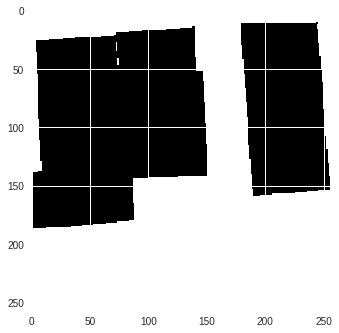

In [0]:
import matplotlib.pyplot as plt
mg =np.squeeze(train_mask[1],axis=-1)
plt.imshow(mg)


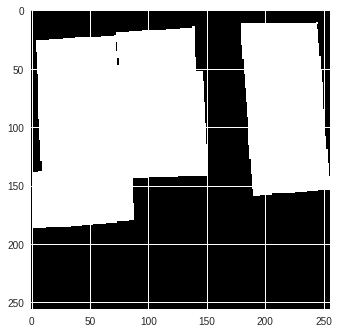

In [0]:
b=np.invert(mg)
plt.imshow(b)

In [0]:
import matplotlib.pyplot as plt
i=0
dir=train_dir+'roo/'
if(not os.path.exists(dir) ):
				os.makedirs(dir)
for m in range(len(train_mask)):
    plt.imsave( dir+str(m+1)+".png",train_img[i],format="png")
    i=i+1

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


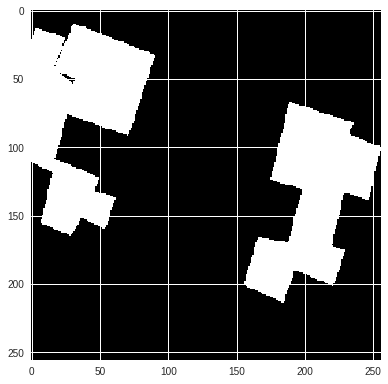

In [0]:
mg =np.squeeze(train_mask[11],axis=-1)
imshow(mg)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


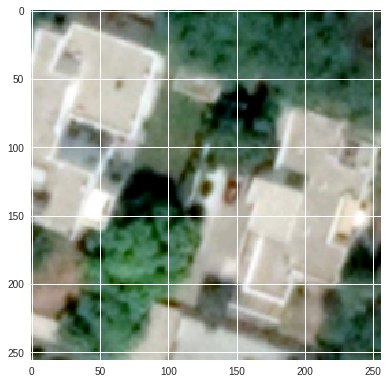

In [0]:
imshow(train_img[11])

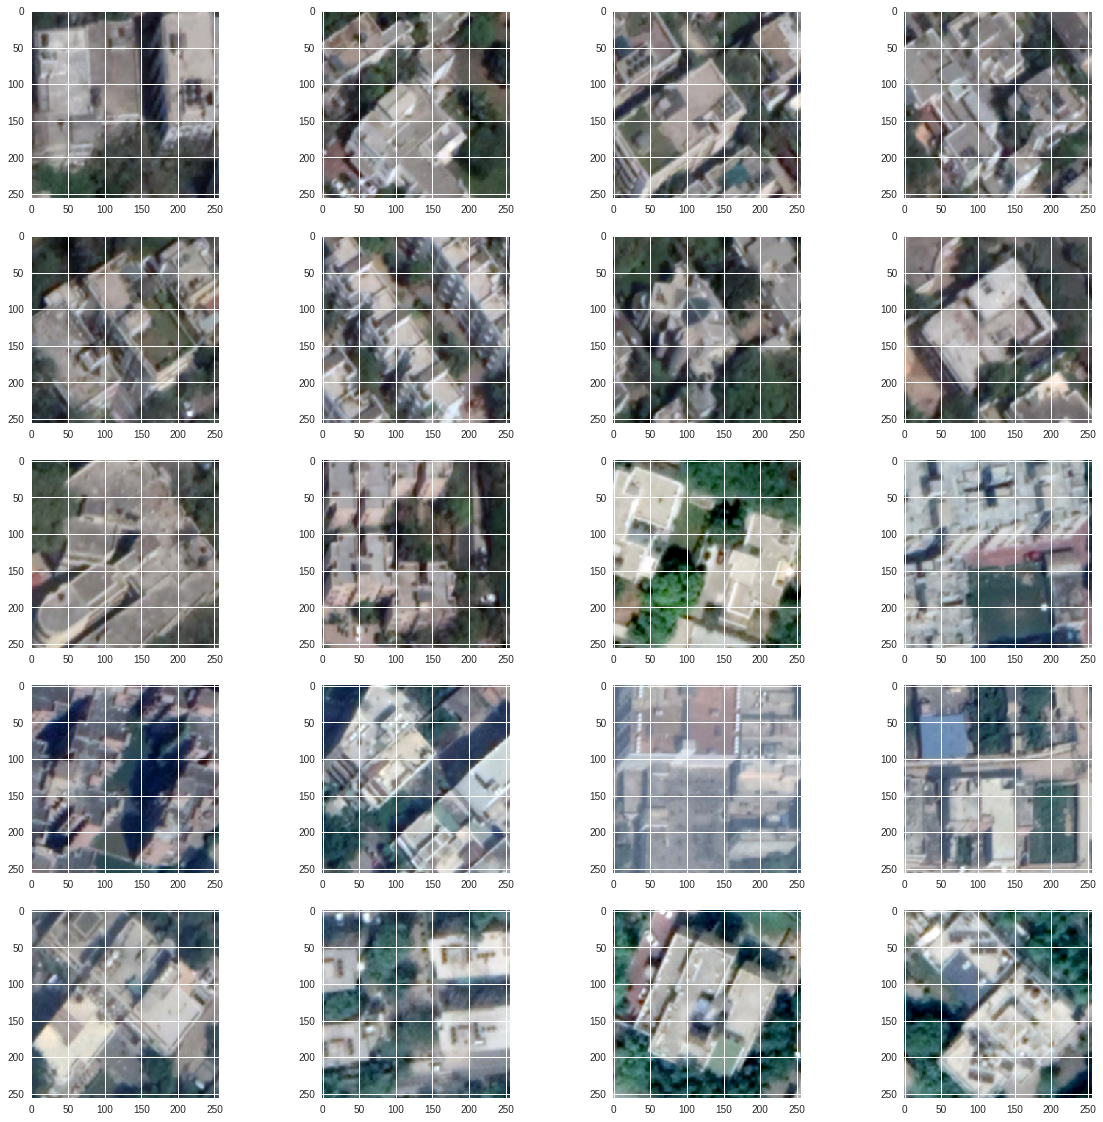

In [0]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = train_img[i]
    fig.add_subplot(rows, columns,i)
    plt.imshow(img)
plt.show()


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


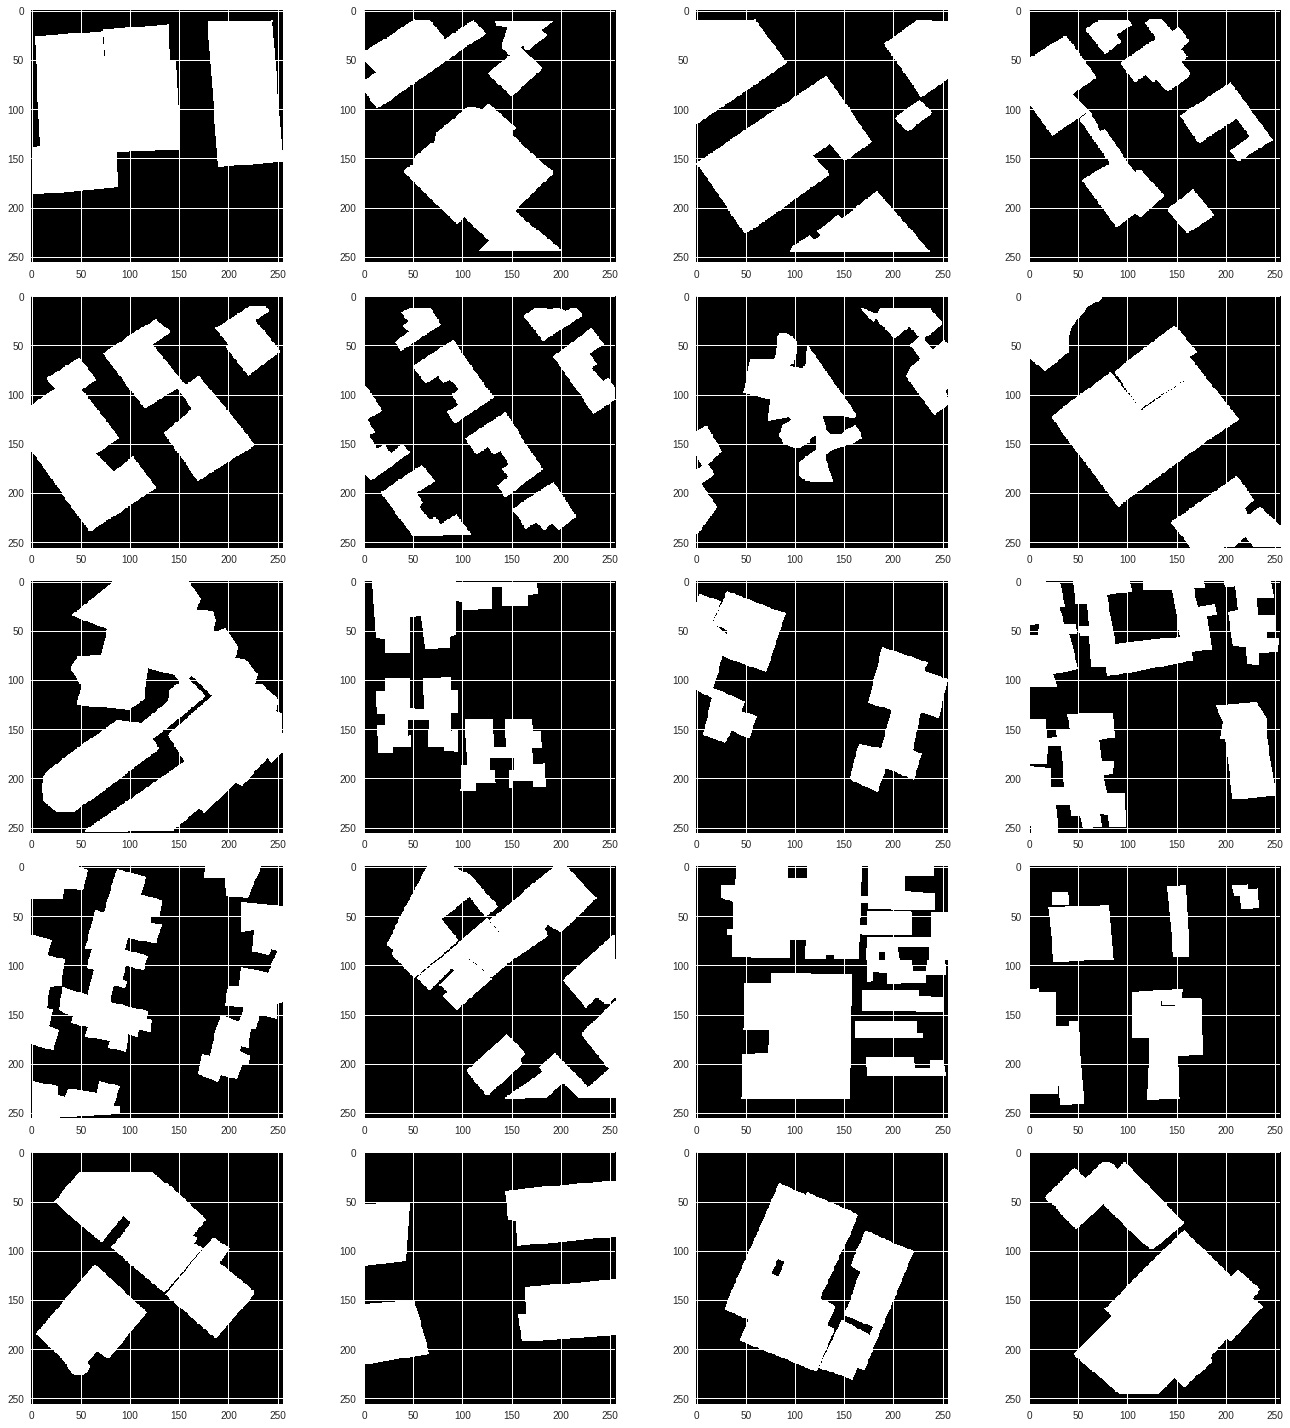

In [0]:
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    mg =np.squeeze(resize(train_mask[i], (256, 256), mode='constant', preserve_range=True),axis=-1)
    fig.add_subplot(rows, columns,i)
    #b=np.invert(mg)
    imshow(mg)
plt.show()



/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


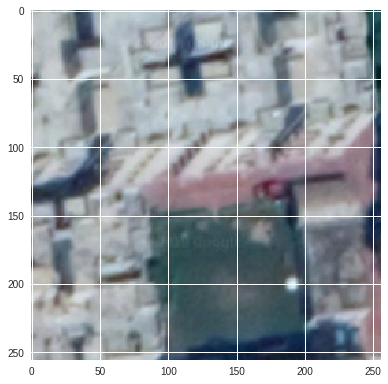

In [0]:
imshow(train_img[12])

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


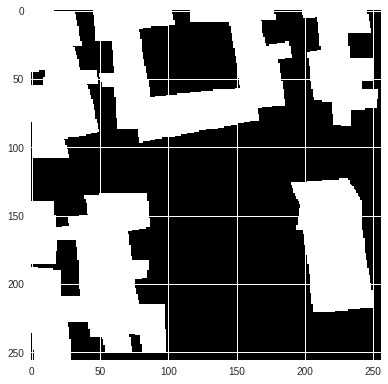

In [0]:
mg =np.squeeze(train_mask[12],axis=-1) 

imshow(mg)

## Train with U-Net

###Model

In [0]:
def u_net(IMG_WIDTH=256,IMG_HEIGHT=256,IMG_CHANNELS=4):
  inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  s = Lambda(lambda x: x / 255) (inputs)
  c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
  c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
  p1 = MaxPooling2D((2, 2)) (c1)

  c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
  c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
  p2 = MaxPooling2D((2, 2)) (c2)

  c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
  c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
  p3 = MaxPooling2D((2, 2)) (c3)

  c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
  c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
  p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

  c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
  c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

  u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
  c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

  u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
  c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

  u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
  c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

  u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
  c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

  outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef])
  model.summary()
  return model

In [0]:
umodel=u_net()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 4)  0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 256, 256, 4)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 256, 256, 8)  296         lambda_4[0][0]                   
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 256, 256, 8)  584         conv2d_58[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [0]:
print("\nTraining...")
umodel.fit(train_img,train_mask,batch_size=8,epochs=30)


Training...
Epoch 1/30
21/21 [==============================] - 2s 103ms/step - loss: 0.6823 - dice_coef: 0.4003
Epoch 2/30
21/21 [==============================] - 0s 18ms/step - loss: 0.6648 - dice_coef: 0.3909
Epoch 3/30
21/21 [==============================] - 0s 17ms/step - loss: 0.6507 - dice_coef: 0.3808
Epoch 4/30
21/21 [==============================] - 0s 17ms/step - loss: 0.6396 - dice_coef: 0.3667
Epoch 5/30
21/21 [==============================] - 0s 16ms/step - loss: 0.6287 - dice_coef: 0.3619
Epoch 6/30
21/21 [==============================] - 0s 16ms/step - loss: 0.6141 - dice_coef: 0.3632
Epoch 7/30
21/21 [==============================] - 0s 16ms/step - loss: 0.5896 - dice_coef: 0.3738
Epoch 8/30
21/21 [==============================] - 0s 16ms/step - loss: 0.5485 - dice_coef: 0.3962
Epoch 9/30
21/21 [==============================] - 0s 16ms/step - loss: 0.5125 - dice_coef: 0.4413
Epoch 10/30
21/21 [==============================] - 0s 16ms/step - loss: 0.5059 - dic

###Test Data

In [0]:
def get_test_data(IMG_WIDTH=256,IMG_HEIGHT=256,IMG_CHANNELS=4):
    #X_test = np.zeros( , IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
    X_test = np.zeros((n_test, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
    sizes_test = []
    print('\nGetting and resizing test images ... ')
    sys.stdout.flush()
    
    a = Progbar(n_test)
    n=0
    for img in os.listdir(test_dir+'roofs/'):
      img=imread(test_dir+'roofs/'+img)
      img = resize( img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
      X_test[n] = img
      a.update(n)
      n=n+1
    np.save("test_img",X_test)
    np.save("test_size",sizes_test)
    return X_test,sizes_test


In [0]:
test_img,test_size=get_test_data()


Getting and resizing test images ... 
4/5 [=======================>......] - ETA: 0s

##Testing U_Net(Predictions)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


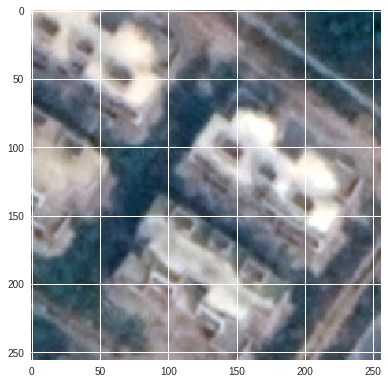

In [0]:
imshow(test_img[4])

In [0]:
predum=umodel.predict(test_img,batch_size=5)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


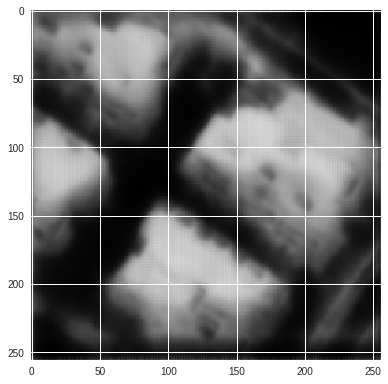

In [0]:
mg =np.squeeze(predum[4],axis=-1)
imshow(mg)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


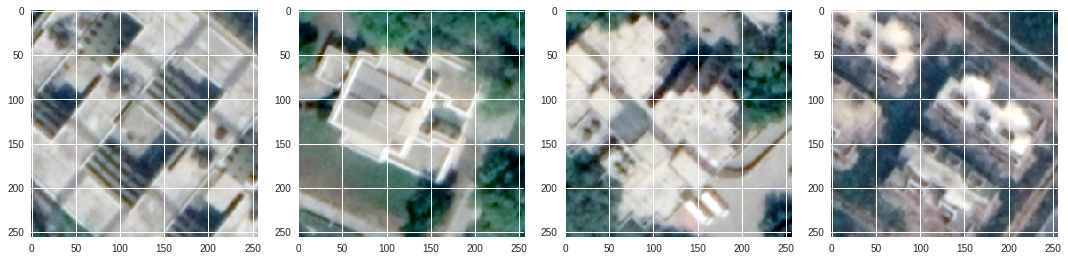

In [0]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 1
for i in range(1, columns*rows +1):
    mg = test_img[i]
    fig.add_subplot(rows, columns,i)
    #b=np.invert(mg)
    imshow(mg)
plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


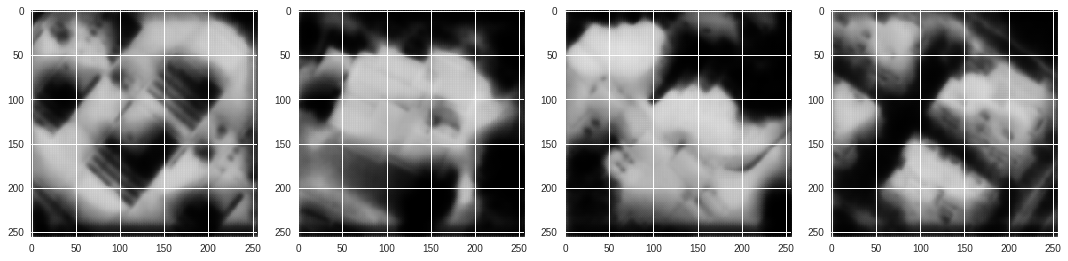

In [0]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 1
for i in range(1, columns*rows +1):
    mg =np.squeeze(resize(predum[i], (256, 256), mode='constant', preserve_range=True),axis=-1)
    fig.add_subplot(rows, columns,i)
    #b=np.invert(mg)
    imshow(mg)
plt.show()



/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


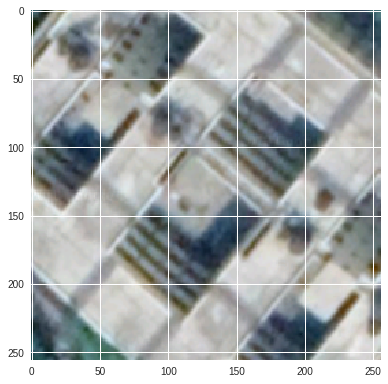

In [0]:
imshow(test_img[1])

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


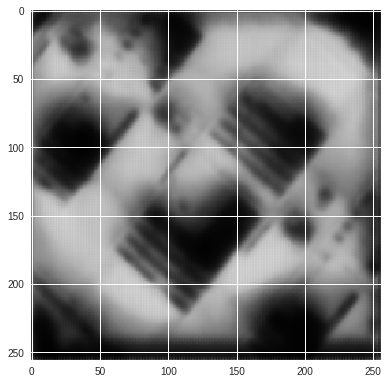

In [0]:

mg =np.squeeze(predum[1],axis=-1)
imshow(mg)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


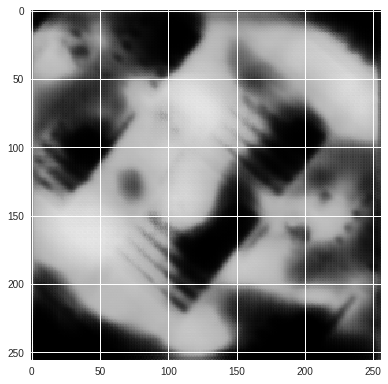

In [0]:

mg =np.squeeze(predu_r[2],axis=-1)
imshow(mg)


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


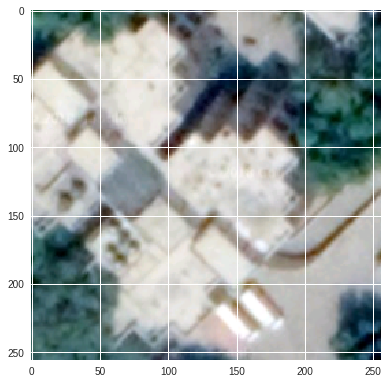

In [0]:
imshow(test_img[3])

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


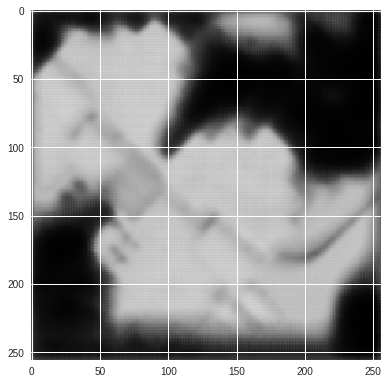

In [0]:

mg =np.squeeze(predu_r[3],axis=-1)
imshow(mg)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


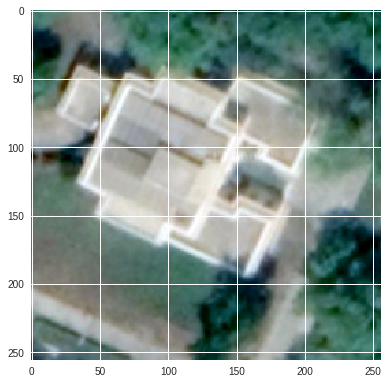

In [0]:
imshow(test_img[2])

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


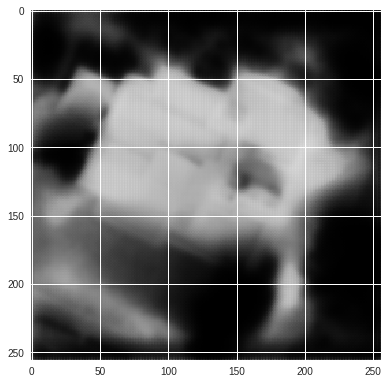

In [0]:

mg =np.squeeze(predum[2],axis=-1)
imshow(mg)

In [0]:
um=umodel


In [0]:

mg =np.squeeze(predum[2],axis=-1)
imshow(mg)

In [0]:
print("\nTraining...")
umodel.fit(train_img,train_mask,batch_size=8,epochs=5)


Training...
Epoch 1/5
21/21 [==============================] - 0s 22ms/step - loss: 0.4033 - dice_coef: 0.5945
Epoch 2/5
21/21 [==============================] - 0s 18ms/step - loss: 0.3953 - dice_coef: 0.6320
Epoch 3/5
21/21 [==============================] - 0s 16ms/step - loss: 0.4028 - dice_coef: 0.6200
Epoch 4/5
21/21 [==============================] - 0s 16ms/step - loss: 0.4268 - dice_coef: 0.6316
Epoch 5/5
21/21 [==============================] - 0s 16ms/step - loss: 0.4180 - dice_coef: 0.5638


In [0]:
predum2=umodel.predict(test_img,batch_size=5)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


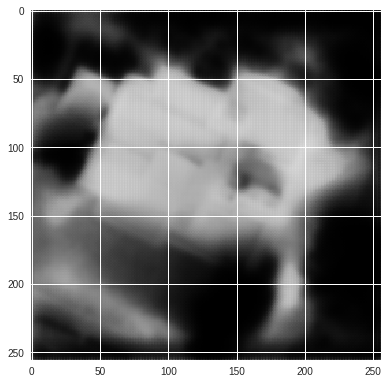

In [0]:

mg =np.squeeze(predum[2],axis=-1)
imshow(mg)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


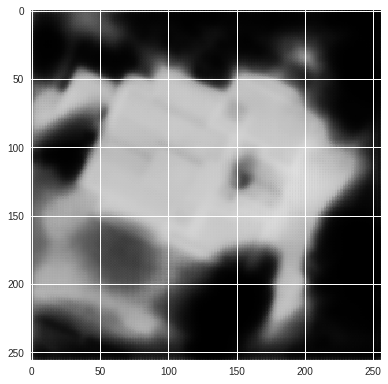

In [0]:

mg =np.squeeze(predum2[2],axis=-1)
imshow(mg)

In [0]:
print("\nTraining...")
umodel.fit(train_img,train_mask,batch_size=8,epochs=5)


Training...
Epoch 1/5
21/21 [==============================] - 0s 21ms/step - loss: 0.4021 - dice_coef: 0.6184
Epoch 2/5
21/21 [==============================] - 0s 17ms/step - loss: 0.3863 - dice_coef: 0.6307
Epoch 3/5
21/21 [==============================] - 0s 16ms/step - loss: 0.3853 - dice_coef: 0.6461
Epoch 4/5
21/21 [==============================] - 0s 16ms/step - loss: 0.3791 - dice_coef: 0.6292
Epoch 5/5
21/21 [==============================] - 0s 16ms/step - loss: 0.3692 - dice_coef: 0.6694


In [0]:
predum3=umodel.predict(test_img,batch_size=5)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


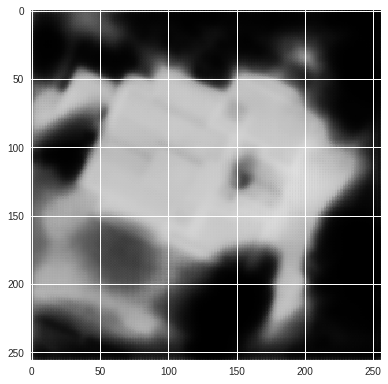

In [0]:

mg =np.squeeze(predum2[2],axis=-1)
imshow(mg)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


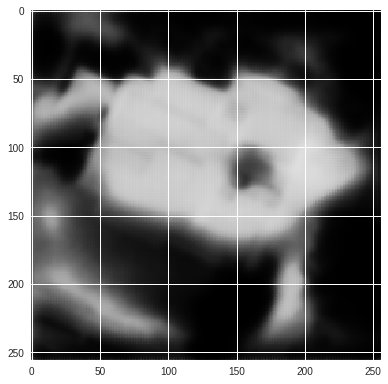

In [0]:

mg =np.squeeze(predum3[2],axis=-1)
imshow(mg)